In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load in our metadata file for analysis
filename = 'stimulusLookup.json'
filepath = '/Users/hannahsheahan/Documents/Postdoc/Experiments/hCategoryLearn/hierarchytest/' + filename

try:
    with open(filepath, "r") as datafile:
        data = json.load(datafile)
except IOError:
    print("Error: '" + filepath + "' does not exist.")


In [3]:
allPlanetData = data['allPlanetData']

# Take a look at our data...
#print(len(allPlanetData))
#print(allPlanetData[0].keys())

# Some initialisation
ringLevel = np.empty((len(allPlanetData),1))
sunLevel = np.empty((len(allPlanetData),1))
mountainHeightLevel = np.empty((len(allPlanetData),1))
mountainRoughnessLevel = np.empty((len(allPlanetData),1))
colourLevel = np.empty((len(allPlanetData),1))
atmosphereLevel = np.empty((len(allPlanetData),1))
dustLevel = np.empty((len(allPlanetData),1))
featureVector = np.empty((len(allPlanetData),7))

features = ["atmosphere", "sun", "colour", "mountainHeight", "dust/moons", "ring", "mountainRoughness"]  # order is arbitrary but must match the first featureVector assignment
for i in range(len(allPlanetData)):
    planetData = allPlanetData[i]
    
    ringLevel[i] = (planetData['ringLevel'])-1
    sunLevel[i] = (planetData['sunLevel'])-1
    mountainHeightLevel[i] = (planetData['mountainHeightLevel'])-1
    mountainRoughnessLevel[i] = (planetData['mountainRoughnessLevel'])-1
    colourLevel[i] = (planetData['colourLevel'])-1
    atmosphereLevel[i] = (planetData['atmosphereLevel'])-1
    dustLevel[i] = (planetData['dustLevel'])-1
    # the ordering of elements in featureVector MUST match the ordering in 'features'
    featureVector[i] = [ atmosphereLevel[i],  sunLevel[i], colourLevel[i], mountainHeightLevel[i], dustLevel[i], ringLevel[i], mountainRoughnessLevel[i] ]

    
# Determine what unique planet types we have in our dataset (there should be 8... yay there are)
featureVector = np.transpose(featureVector)    

# determine the order of feature arrangement in the hierarchy
nullFeatureCounts = np.sum(featureVector==0,axis=1)
featureOrderInd = np.argsort(nullFeatureCounts)
features = [features[featureOrderInd[i]] for i in range(len(featureOrderInd))]

print("The number of null states for each feature in featureVector: " )
numFeatures = {'Feature':features, 'Count':nullFeatureCounts}
df = pd.DataFrame(numFeatures)
print(df)

print("\nThe sorted dataset hierarchy is:")
for i in range(len(features)):
    if i==0:
        print("----")
        print("1. ")
    elif i==1:
        print("----")
        print("2. ")
    elif i==3:
        print("----")
        print("3. ")
    print(features[i])

# Now sort the featureVector order so that it appropriately captures the feature hierarchy
sortedFeatureVector = np.empty(featureVector.shape)
for i in range(len(featureOrderInd)):
    sortedFeatureVector[i] = featureVector[featureOrderInd[i]]
featureVector = sortedFeatureVector.copy()

planetTypes, plantsCounts = np.unique(featureVector, axis=1, return_counts=True)  # feature x planetName, counts of each planet


The number of null states for each feature in featureVector: 
   Count            Feature
0    800             colour
1    800         atmosphere
2      0                sun
3   1200     mountainHeight
4   1200         dust/moons
5   1200               ring
6   1200  mountainRoughness

The sorted dataset hierarchy is:
----
1. 
colour
----
2. 
atmosphere
sun
----
3. 
mountainHeight
dust/moons
ring
mountainRoughness


[[-1. -1. -1. -1.  1.  1.  1.  1.]
 [-1. -1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1. -1.  1.  1.]
 [-1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  1.]]


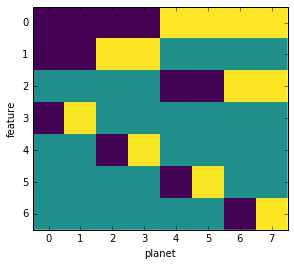

In [4]:
# Show the planet feature matrix
print(planetTypes)
plt.imshow(planetTypes, interpolation='none', cmap='viridis')
plt.ylabel('feature')
plt.xlabel('planet')
plt.show()


In [16]:
for i in range(len(allPlanetData)):
    shapeNoise = allPlanetData[i]['shapeNoiseLayers']
    print(shapeNoise[0]['noiseSettings']['simpleNoiseSettings']['strength'])

0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
0.20118960738182068
